# **Instagram Influencer Engagement Analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [ ]:
# Load the dataset
df = pd.read_csv('top_insta_influencers_data.csv')
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [ ]:
df.shape

(200, 10)

In [ ]:
df.isna().sum()

,0
rank,0
channel_info,0
influence_score,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,0
new_post_avg_like,0
total_likes,0
country,62


In [ ]:
df['total_likes'].unique()

array(['29.0b', '57.4b', '6.0b', '11.5b', '12.5b', '19.9b', '18.4b',
       '7.4b', '9.8b', '13.9b', '3.7b', '3.0b', '313.6m', '1.3b', '5.3b',
       '4.9b', '13.5b', '7.7b', '1.6b', '14.1b', '1.5b', '4.3b', '20.6b',
       '5.0b', '91.3m', '17.9b', '4.2b', '6.8b', '9.0b', '3.4b', '11.6b',
       '5.9b', '2.6b', '2.3b', '2.5b', '5.6b', '5.1b', '1.9b', '2.0b',
       '8.2b', '423.5m', '2.8b', '3.5b', '4.8b', '8.8b', '4.4b', '3.3b',
       '419.0m', '6.6b', '639.0m', '1.7b', '470.7m', '5.4b', '3.8b',
       '2.9b', '2.2b', '6.7b', '1.1b', '1.8b', '10.1b', '669.3m', '3.6b',
       '8.9b', '453.6m', '421.7m', '2.4b', '987.4m', '6.1b', '654.4m',
       '1.0b', '824.0m', '283.0m', '753.1m', '2.7b', '773.5m', '9.6b',
       '18.3m', '3.2b', '784.0m', '1.2b', '925.7m', '820.1m', '782.5m',
       '949.9m', '580.7m', '710.7m', '67.5m', '368.1m', '767.0m',
       '863.0m', '452.0m', '957.9m', '500.5m', '529.9m', '563.9m',
       '439.4m', '1.4b', '199.8m', '644.1m', '594.7m', '672.1m', '66.7m',
 

In [ ]:
df['total_likes'].dtype

dtype('O')

In [ ]:
#  Convert large numbers (e.g., '1.2B') to float
def convert_to_number(x):
    try:
        if pd.isnull(x):
            return None
        x = str(x).strip().replace(',', '').lower()
        match = re.match(r"^([0-9]*\.?[0-9]+)([kmb]?)$", x)
        if match:
            num, suffix = match.groups()
            num = float(num)
            if suffix == 'b':
                return num * 1e9
            elif suffix == 'm':
                return num * 1e6
            elif suffix == 'k':
                return num * 1e3
            else:
                return num
        else:
            return float(x)
    except Exception as e:
        print(f"Conversion failed for: {x} -> {e}")
        return None

In [ ]:
# List of columns to convert
columns_to_convert = ['posts', 'followers', 'avg_likes', 'new_post_avg_like','total_likes',]

In [ ]:
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_number)

In [ ]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39%,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62%,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24%,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97%,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20%,665300.0,1.250000e+10,United States


In [ ]:
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

In [ ]:
# Filter influencers with more than 100 million followers
df_over_100M = df[df['followers'] > 100000000]
df_over_100M

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States
8,9,khloekardashian,89,4100.0,268300000.0,2400000.0,0.35,926900.0,9.800000e+09,United States
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,1.390000e+10,Canada


We have 33 influencers with more than 100 million followers.The top 5 being Cristiano,Kyliejenner,Leomessi,Salena Gomez, and therock

---



In [ ]:
# Range of number of posts for each influence score
posts_range_influence = df.groupby('influence_score')['posts'].agg(['min', 'max'])
print(posts_range_influence)

                    min      max
influence_score                 
22                840.0    840.0
41                370.0    370.0
42               1500.0   2000.0
47                 30.0     30.0
57                590.0    590.0
58                100.0    100.0
63               4500.0   4500.0
68               1900.0   1900.0
70                870.0    870.0
71               2300.0   2300.0
72               4400.0   4400.0
73                690.0   1400.0
74                730.0   2100.0
75               1600.0  13400.0
76                380.0   4900.0
77               1200.0  10000.0
78                590.0  11600.0
79                770.0  10300.0
80                 20.0   8900.0
81                660.0  10000.0
82                160.0  16900.0
83                 10.0  17500.0
84                420.0   8200.0
85                 90.0  10000.0
86                420.0  10000.0
87                340.0  12900.0
88                 80.0   8200.0
89               1200.0   4400.0
90        

Posts show no clear correlation with influence score — someone with 10 posts could be as influential as someone with 10,000.

In [ ]:
# Range of number of followers for each influence score
followers_range_influence = df.groupby('influence_score')['followers'].agg(['min', 'max'])
print(followers_range_influence)

                         min          max
influence_score                          
22                52500000.0   52500000.0
41                33500000.0   33500000.0
42                44500000.0   56900000.0
47                35900000.0   35900000.0
57                46900000.0   46900000.0
58                39100000.0   39100000.0
63                33500000.0   33500000.0
68                34700000.0   34700000.0
70                80900000.0   80900000.0
71                33200000.0   33200000.0
72                35000000.0   35000000.0
73                41800000.0  105200000.0
74                39100000.0   85900000.0
75                33300000.0  140500000.0
76                35300000.0   68900000.0
77                34200000.0   67700000.0
78                33000000.0   67700000.0
79                33200000.0   58700000.0
80                32800000.0   57600000.0
81                33200000.0   73900000.0
82                35600000.0   68700000.0
83                34100000.0   699

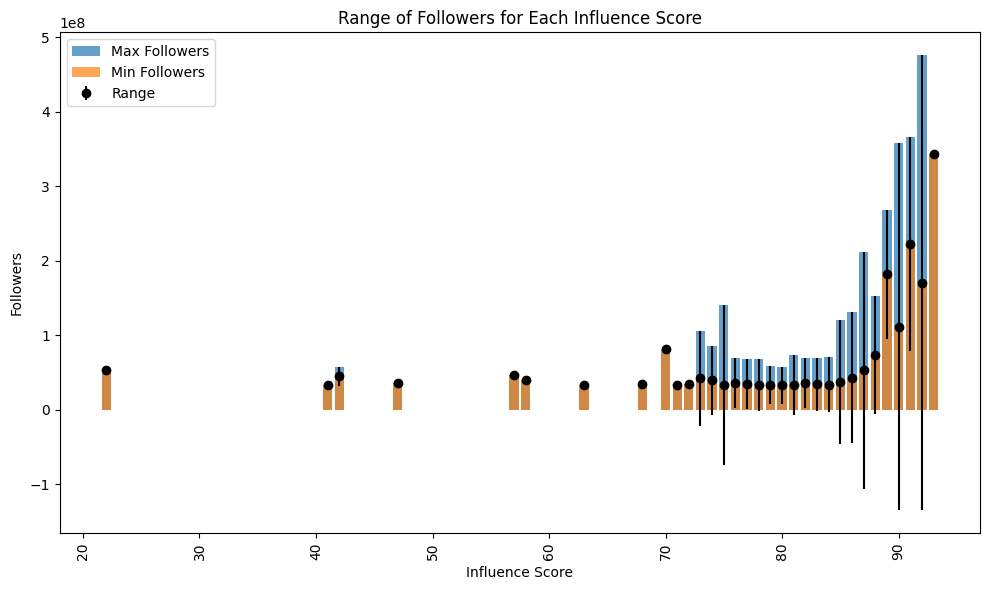

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate range (min and max followers for each influence score)
followers_range_influence = df.groupby('influence_score')['followers'].agg(['min', 'max'])

# Plotting the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(followers_range_influence.index, followers_range_influence['max'], label='Max Followers', alpha=0.7)
plt.bar(followers_range_influence.index, followers_range_influence['min'], label='Min Followers', alpha=0.7)

# Adding error bars
plt.errorbar(followers_range_influence.index, followers_range_influence['min'],
             yerr=followers_range_influence['max'] - followers_range_influence['min'],
             fmt='o', color='black', label='Range')

# Labels and title
plt.xlabel('Influence Score')
plt.ylabel('Followers')
plt.title('Range of Followers for Each Influence Score')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



*  There's a clear overall trend of increasing follower counts as the influence
score increases.** This suggests that accounts with higher influence scores tend to have a larger number of followers.**

*   Wider Range at Higher Influence Scores: Notice that the vertical black lines (representing the range) tend to be much longer for higher influence scores (especially above 80). This indicates a **greater variability in follower counts among highly influential accounts**. Some highly influential accounts have significantly more followers than others within the same high influence score range.

*   Smaller Range at Lower Influence Scores: For lower influence scores, the range of follower counts is generally smaller. This suggests that accounts with lower influence tend to have more similar follower counts within their respective influence score groups.


In [ ]:
# Range of number of likes for each influence score
likes_range_influence = df.groupby('influence_score')['total_likes'].agg(['min', 'max'])
print(likes_range_influence)

                          min           max
influence_score                            
22               1.500000e+09  1.500000e+09
41               3.919000e+08  3.919000e+08
42               8.201000e+08  1.800000e+09
47               1.870000e+07  1.870000e+07
57               2.800000e+09  2.800000e+09
58               4.394000e+08  4.394000e+08
63               3.100000e+09  3.100000e+09
68               2.800000e+09  2.800000e+09
70               5.100000e+09  5.100000e+09
71               1.400000e+09  1.400000e+09
72               1.900000e+09  1.900000e+09
73               1.500000e+09  5.900000e+09
74               1.600000e+09  3.400000e+09
75               1.300000e+09  5.000000e+09
76               6.670000e+07  4.400000e+09
77               1.400000e+09  6.600000e+09
78               1.600000e+09  9.600000e+09
79               1.492000e+08  8.900000e+09
80               1.830000e+07  2.300000e+09
81               5.299000e+08  6.100000e+09
82               4.536000e+08  4

In [ ]:
# Range of likes in the dataset
likes_range = df['total_likes'].agg(['min', 'max'])
print(likes_range)

min    1.830000e+07
max    5.740000e+10
Name: total_likes, dtype: float64


In [ ]:
# Range of followers in the dataset
followers_range = df['followers'].agg(['min', 'max'])
print(followers_range)

min     32800000.0
max    475800000.0
Name: followers, dtype: float64


In [ ]:
# Range of 60_day_eng_rate in the dataset
eng_rate_range = df['60_day_eng_rate'].agg(['min', 'max'])
print(eng_rate_range)

min     0.01
max    26.41
Name: 60_day_eng_rate, dtype: float64


In [ ]:
# Filter influencers with engagement rate above 10%
df_engagement_above_5 = df[df['60_day_eng_rate'] > 10.00]
df_engagement_above_5

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
53,54,tomholland2013,77,1200.0,67700000.0,5400000.0,10.83,7300000.0,6.600000e+09,NaN
78,79,karolg,83,3300.0,55600000.0,3100000.0,10.25,5700000.0,1.010000e+10,India
102,103,thv,83,60.0,49300000.0,15400000.0,25.80,12600000.0,9.874000e+08,NaN
138,139,badbunnypr,83,10.0,42100000.0,3700000.0,13.09,5400000.0,6.750000e+07,NaN
140,141,j.m,83,20.0,41900000.0,14200000.0,26.41,11000000.0,3.681000e+08,NaN


thv and jm have max 60_day engagement rate, out of 200 influencers only 5 have 60_day engagement rate above 10. Their followers are in range of 41900000 to 67700000. Their posts are in range of 10 to 1200,while new posts average likes from 5400000 to 12600000.

Engagement rate (60-day) >10% is rare (only 5 influencers), indicating it's a strong differentiator.

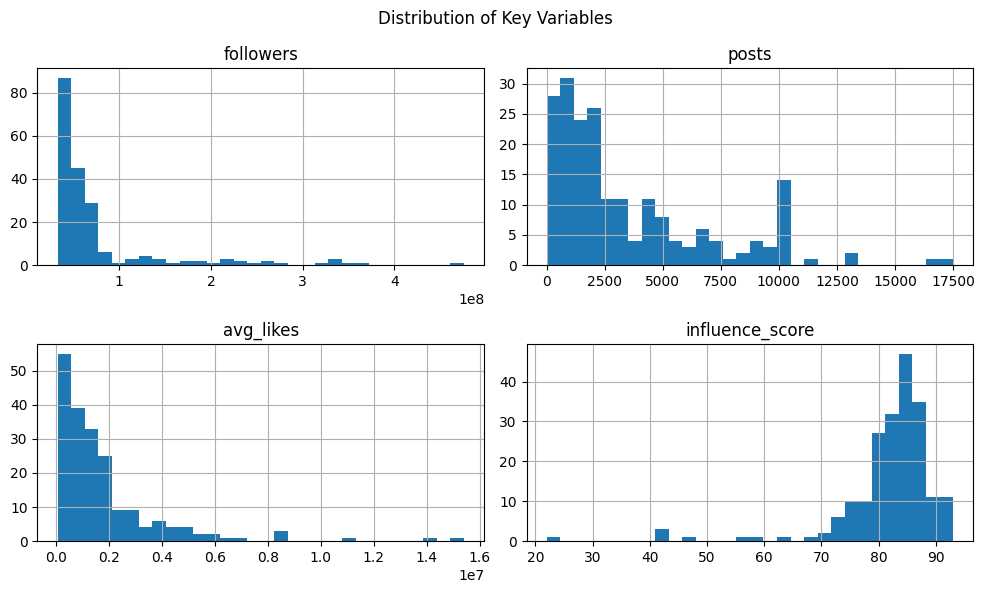

In [ ]:
# Histograms for key metrics
df[['followers', 'posts', 'avg_likes', 'influence_score']].hist(bins=30, figsize=(10, 6))
plt.suptitle('Distribution of Key Variables')
plt.tight_layout()
plt.show()

Followers, avg likes, and posts are heavily right-skewed.

Influence score is left-skewed or multi-modal, indicating high concentration in upper range (80–95).

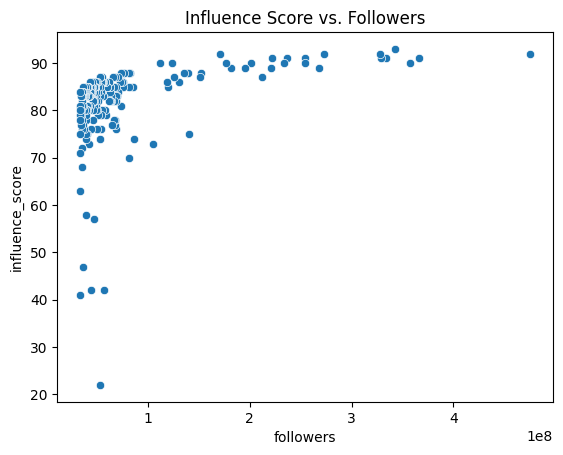

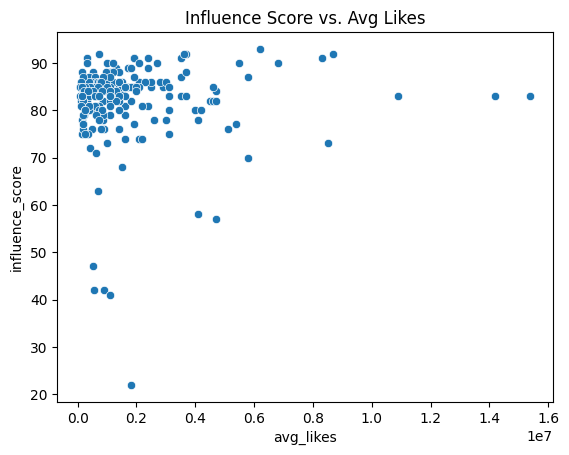

In [ ]:
from csv import field_size_limit
# Influence score vs. followers
plt.fig_size=(20,10)
sns.scatterplot(data=df, x='followers', y='influence_score')
plt.title('Influence Score vs. Followers')
plt.show()

# Influence score vs. avg_likes
plt.fig_size=(20,10)
sns.scatterplot(data=df, x='avg_likes', y='influence_score')
plt.title('Influence Score vs. Avg Likes')
plt.show()

* # **Followers vs. Influence Score**: Shows a positive relationship with a potential saturation point at very high follower counts, suggesting that beyond a certain threshold, the number of followers alone might not significantly increase the influence score.
* # **Average Likes vs. Influence Score**: Displays a stronger and more consistent positive correlation, indicating that higher engagement (average likes) is a significant driver of a higher influence score.

In [ ]:
# Top 10 influencers by followers
top_by_followers = df.nlargest(10, 'followers')[['channel_info', 'followers', 'influence_score']]
top_by_followers

,channel_info,followers,influence_score
0,cristiano,475800000.0,92
1,kyliejenner,366200000.0,91
2,leomessi,357300000.0,90
3,selenagomez,342700000.0,93
4,therock,334100000.0,91
5,kimkardashian,329200000.0,91
6,arianagrande,327700000.0,92
7,beyonce,272800000.0,92
8,khloekardashian,268300000.0,89
9,justinbieber,254500000.0,91


<ipython-input-25-43be26806314>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg_score = df.groupby('followers_bin')['influence_score'].mean()


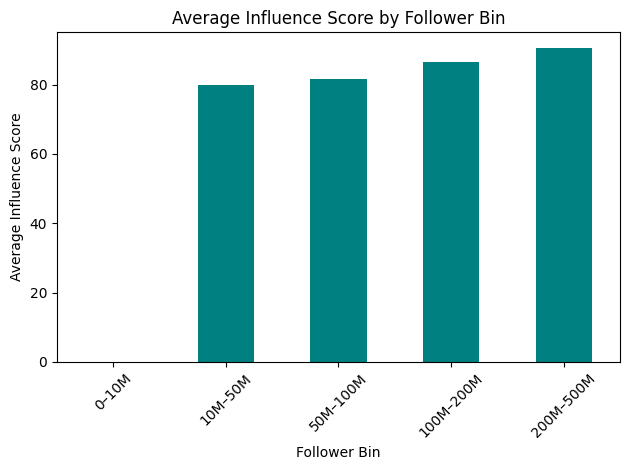

In [ ]:
# Adjusted bins to match follower range
df['followers_bin'] = pd.cut(
    df['followers'],
    bins=[0, 10_000_000, 50_000_000, 100_000_000, 200_000_000, 500_000_000],
    labels=['0–10M', '10M–50M', '50M–100M', '100M–200M', '200M–500M']
)

# Plot average influence score per bin
bin_avg_score = df.groupby('followers_bin')['influence_score'].mean()
bin_avg_score.plot(kind='bar', color='teal')

plt.title('Average Influence Score by Follower Bin')
plt.ylabel('Average Influence Score')
plt.xlabel('Follower Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**From your bin-wise influence score chart:**

* 0–10M Followers: Lowest avg influence

* 100M–500M Followers: Highest avg influence

**Cybersecurity Implications:**

* These highly influential accounts can be prime targets for malicious activities (e.g., account hijacking, disinformation campaigns).

* Monitoring is crucial due to their wide-reaching potential in spreading content — real or manipulated.

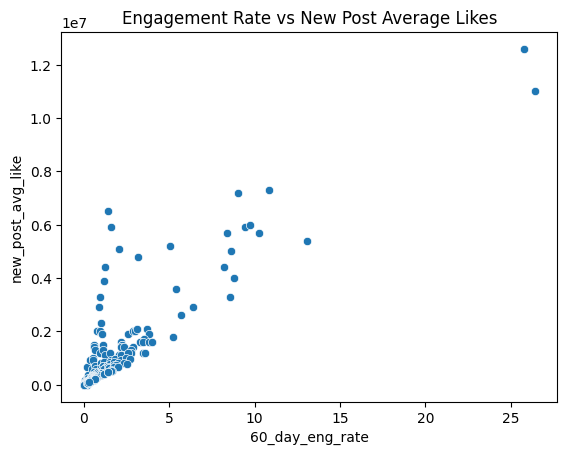

In [ ]:
sns.scatterplot(data=df, x='60_day_eng_rate', y='new_post_avg_like')
plt.title('Engagement Rate vs New Post Average Likes')
plt.show()


This scatter plot highlights the tight relationship between an influencer's recent engagement performance and the immediate reception of their new content in terms of likes. A high 60-day engagement rate is a strong predictor of a high average number of likes on new posts. This makes intuitive sense, as an engaged audience is more likely to interact with all of an influencer's content, including their latest posts. For brands looking to collaborate with influencers, this underscores the importance of considering not just follower count but also the influencer's engagement rate as a measure of their audience's activity and responsiveness.

In [ ]:
#Create a custom weighted score combining influence, likes, and engagement rate:

# Normalize columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['followers', 'avg_likes', '60_day_eng_rate', 'influence_score']] = scaler.fit_transform(
    df_scaled[['followers', 'avg_likes', '60_day_eng_rate', 'influence_score']]
)

# Custom score (adjust weights as desired)
df_scaled['custom_score'] = (
    0.4 * df_scaled['influence_score'] +
    0.3 * df_scaled['followers'] +
    0.2 * df_scaled['avg_likes'] +
    0.1 * df_scaled['60_day_eng_rate']
)

top_custom = df_scaled.nlargest(10, 'custom_score')[['channel_info', 'custom_score']]
print(top_custom)


      channel_info  custom_score
0        cristiano      0.812211
1      kyliejenner      0.728010
2         leomessi      0.695347
3      selenagomez      0.693513
102            thv      0.652525
6     arianagrande      0.645987
5    kimkardashian      0.637549
140            j.m      0.634174
4          therock      0.617424
10   kendalljenner      0.611468


Custom metric (weighted avg. of influence score, followers, likes, 60-day engagement rate) shows:

cristiano, kyliejenner, leomessi, and thv dominate

thv and j.m stand out due to high engagement despite fewer followers

In [ ]:
df['likes_per_1k_followers'] = (df['avg_likes'] / df['followers']) * 1000
top_engaged = df.nlargest(10, 'likes_per_1k_followers')[['channel_info', 'likes_per_1k_followers']]
print(top_engaged)

        channel_info  likes_per_1k_followers
140              j.m              338.902148
102              thv              312.373225
167            rkive              294.594595
147  jenniferaniston              113.022113
155         mahi7781              104.859335
118             zayn              101.075269
114      harrystyles              100.213220
97             adele               92.702170
186      blakelively               89.595376
138       badbunnypr               87.885986


High likes per 1k followers (like for j.m, thv) show that micro-/mid-tier influencers can outperform in terms of per-follower engagement.

In [ ]:
# Set style
sns.set(style="whitegrid", palette="pastel")

# Function to create barplot
def plot_top_10(df, column, title, xlabel):
    top_10 = df.nlargest(10, column)
    plt.figure(figsize=(10,6))
    sns.barplot(x=column, y='channel_info', data=top_10, palette="viridis")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Instagram Handle")
    plt.tight_layout()
    plt.show()

<ipython-input-29-59a28b4e8a5b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='channel_info', data=top_10, palette="viridis")


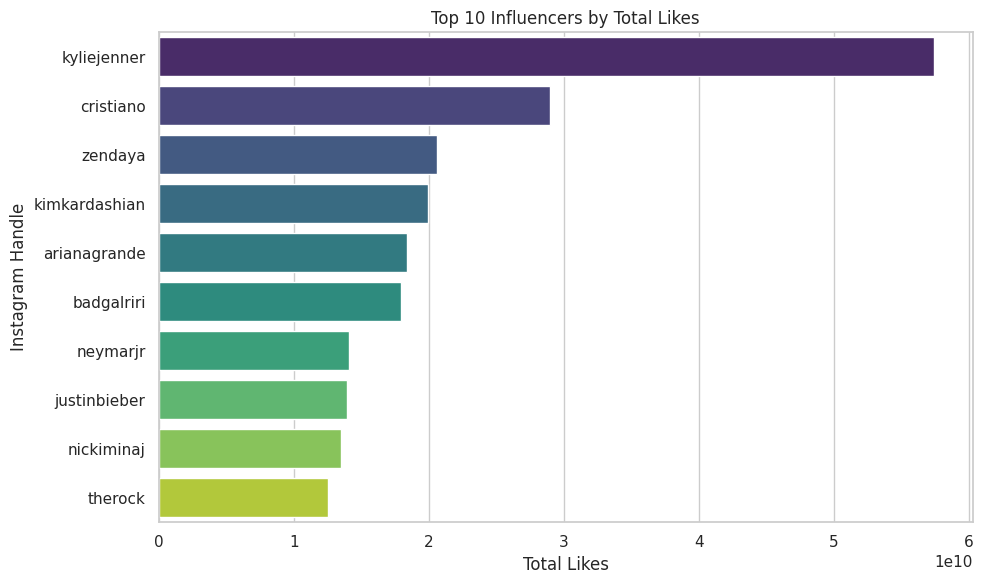

In [ ]:
# Plot Top 10 by Total Likes
plot_top_10(df, 'total_likes', 'Top 10 Influencers by Total Likes', 'Total Likes')

* **Kylie Jenner's Dominance**: Her significantly higher total likes suggest an exceptionally large and engaged audience or a very high volume of highly liked posts over time.
* **High Engagement for Top Celebrities**: The sheer number of likes for all these individuals underscores their massive reach and influence on the platform.
* **Potential Marketing Value**: Brands looking for influencer collaborations would likely consider these individuals, especially Kylie Jenner and Cristiano
Ronaldo, due to their vast engagement. However, the cost of collaboration would likely be very high.
* **Audience Size and Activity**: Total likes can be an indicator of audience size, activity, and the resonance of the content shared by these influencers.
* **Trend Analysis Over Time:** This is a snapshot in time. The ranking and total likes for these individuals can change over time based on their posting frequency, content type, and evolving audience engagement.

<ipython-input-29-59a28b4e8a5b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='channel_info', data=top_10, palette="viridis")


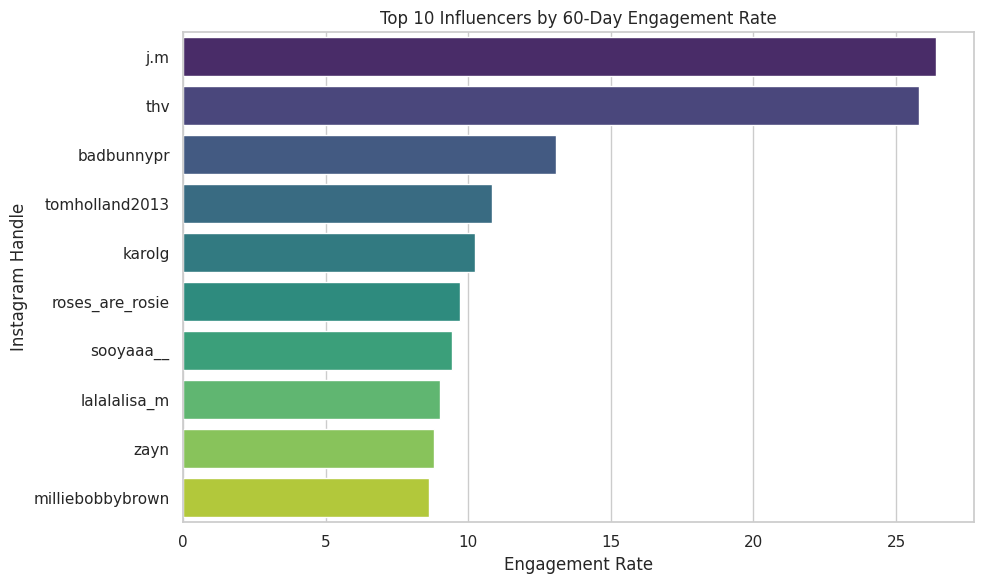

In [ ]:
# Plot Top 10 by Engagement Rate
plot_top_10(df, '60_day_eng_rate', 'Top 10 Influencers by 60-Day Engagement Rate', 'Engagement Rate')

* **High Engagement Indicates Active and Interested Audience:** Influencers with
high engagement rates like "j.m" and "thv" likely have a very active and responsive audience. Their followers are not just passively following but are actively interacting with their content.
* **Potential for Stronger Impact:** A high engagement rate often translates to a stronger impact for sponsored content or messages, as a larger proportion of the audience is likely to see and interact with the posts.
* **Different Ranking Compared to Total Likes**: The ranking here is significantly different from the "Top 10 Influencers by Total Likes" chart. For example, while Kylie Jenner had the highest total likes, she is not present in this top 10 for engagement rate, suggesting that while her reach is massive, her audience might not engage with her content as actively on a per-follower basis compared to these influencers.
* **Value for Targeted Campaigns**: For brands aiming for high interaction and impact with their target audience, influencers with high engagement rates, even if they have a smaller overall follower count than someone like Kylie Jenner, might be more effective.
* **Authenticity Indicator:** A consistently high engagement rate can sometimes be an indicator of a more authentic and engaged community, less reliant on artificial inflation of followers or likes.

<ipython-input-29-59a28b4e8a5b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='channel_info', data=top_10, palette="viridis")


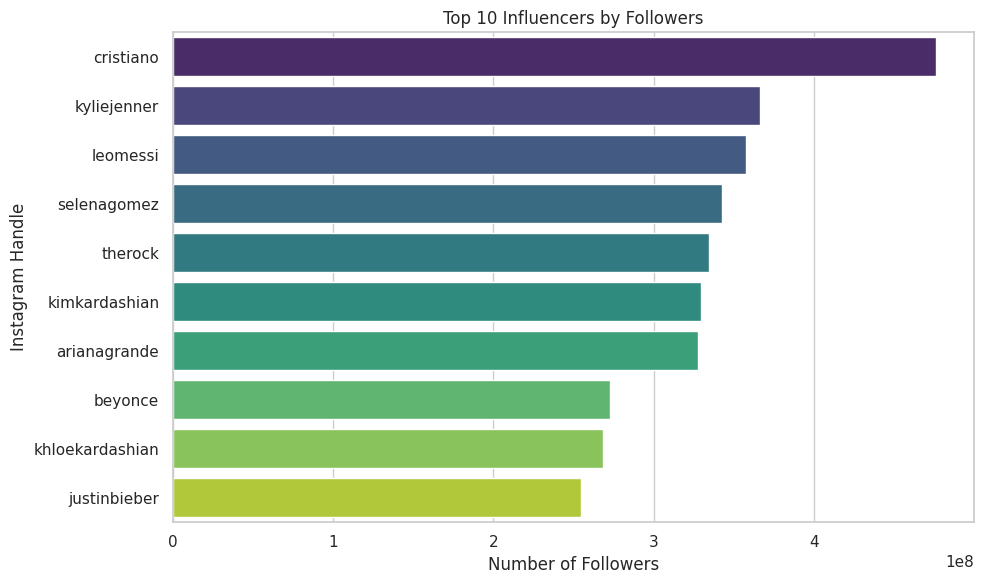

In [ ]:
# Plot Top 10 by Followers
plot_top_10(df, 'followers', 'Top 10 Influencers by Followers', 'Number of Followers')

* **Massive Reach of Top Celebrities:** The sheer number of followers for these individuals demonstrates their immense reach and potential influence on the platform.
* **Brand Partnership Opportunities:** These influencers are highly sought after for brand partnerships due to their ability to reach a vast audience.
* **Potential for Wide-Scale Impact**: Their posts and endorsements can have a significant impact on trends, consumer behavior, and public opinion.
* **Comparison with Engagement**: Comparing this chart with the "Top 10 Influencers by 60-Day Engagement Rate" provides a more comprehensive view of influence. While Cristiano Ronaldo and Kylie Jenner have the largest audiences, their engagement rates might be different compared to influencers with smaller but more active followings.
* **Understanding Audience Size:** For marketers, this data is crucial for understanding the potential scale of campaigns when collaborating with these top influencers.

<ipython-input-29-59a28b4e8a5b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='channel_info', data=top_10, palette="viridis")


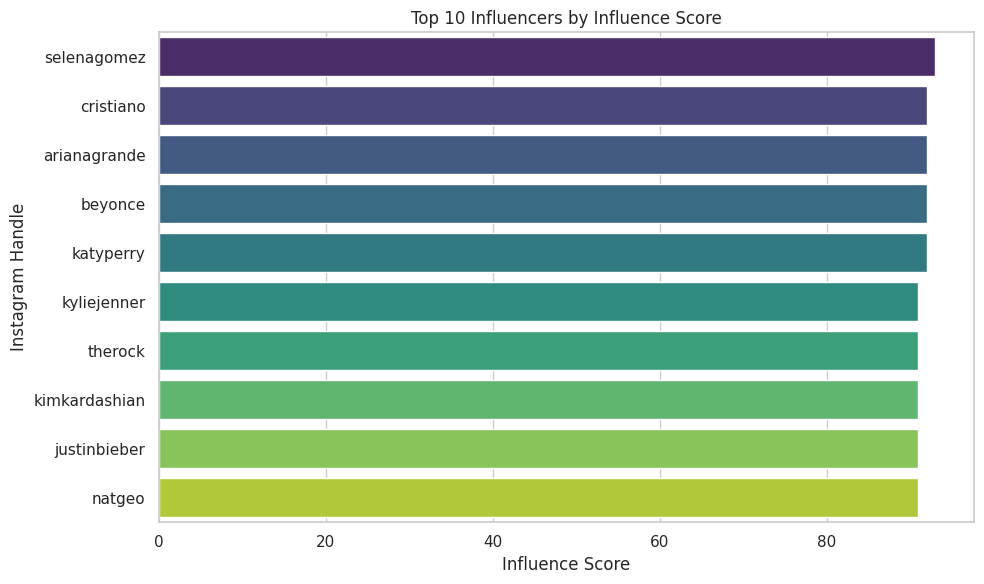

In [ ]:
# Plot Top 10 by Influence Score
plot_top_10(df, 'influence_score', 'Top 10 Influencers by Influence Score', 'Influence Score')

In [ ]:
# Filter the DataFrame to keep only rows where 'country' is not null or empty
df_with_countries = df[df['country'].notnull() & (df['country'] != '')]

In [ ]:
df_with_countries.shape

(138, 12)

In [ ]:
df_with_countries.isna().sum()

,0
rank,0
channel_info,0
influence_score,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,0
new_post_avg_like,0
total_likes,0
country,0


In [ ]:
# Count the number of influencers by country
country_counts = df_with_countries['country'].value_counts()
country_counts

,count
country,
United States,66
Brazil,13
India,12
Indonesia,7
France,6
Spain,5
United Kingdom,4
Canada,3
Colombia,3


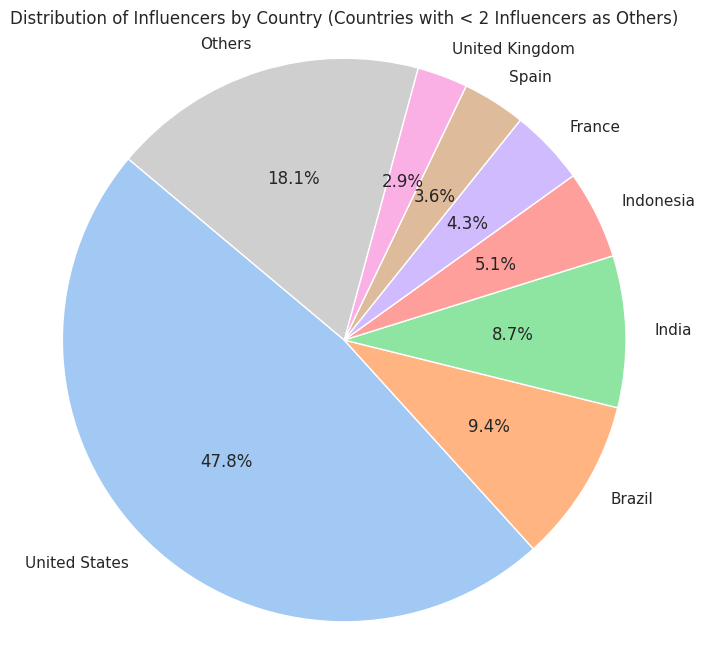

In [ ]:

# Group countries with less than 2 influencers as 'Others'
country_counts_filtered = country_counts[country_counts > 3]
others_count = country_counts[country_counts <= 3].sum()

# Add 'Others' to the filtered counts
country_counts_filtered['Others'] = others_count

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts_filtered, labels=country_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Influencers by Country (Countries with < 2 Influencers as Others)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

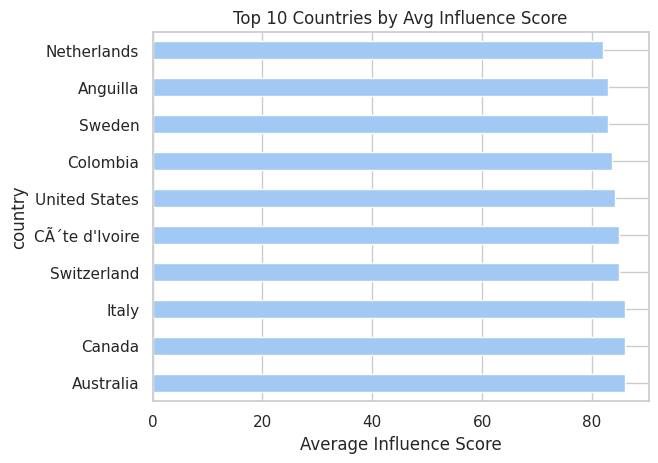

In [ ]:
# Top 10 countries by average influence score
country_avg_score = df_with_countries.dropna(subset=['country']).groupby('country')['influence_score'].mean().sort_values(ascending=False).head(10)
country_avg_score.plot(kind='barh')
plt.title('Top 10 Countries by Avg Influence Score')
plt.xlabel('Average Influence Score')
plt.show()

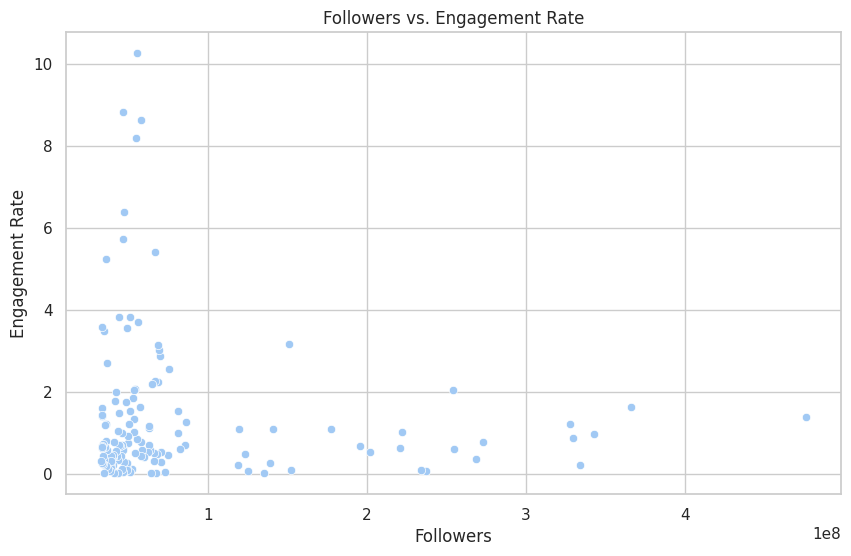

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=df_with_countries)
plt.title('Followers vs. Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate')
plt.show()


In [ ]:
df_with_countries['followers_per_post'] = df_with_countries['followers'] / df_with_countries['posts']
df_with_countries['likes_per_follower'] = df_with_countries['total_likes'] / df_with_countries['followers']

<ipython-input-41-0c42d6eae033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_countries['followers_per_post'] = df_with_countries['followers'] / df_with_countries['posts']
<ipython-input-41-0c42d6eae033>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_countries['likes_per_follower'] = df_with_countries['total_likes'] / df_with_countries['followers']


In [ ]:
df_with_countries

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,followers_bin,likes_per_1k_followers,followers_per_post,likes_per_follower
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain,200M–500M,18.284994,144181.818182,60.949979
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States,200M–500M,22.665210,53072.463768,156.744948
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States,200M–500M,18.091625,190388.888889,33.557047
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States,200M–500M,5.686920,49132.352941,37.413948
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States,200M–500M,10.631835,58785.714286,60.449575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,United States,10M–50M,18.789157,14434.782609,42.168675
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,France,10M–50M,11.759036,8736.842105,45.180723
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,Brazil,10M–50M,5.822289,43116.883117,4.493976
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42,467700.0,1.700000e+09,United States,10M–50M,21.806061,14347.826087,51.515152


In [ ]:
df_with_countries['followers_per_post'].sort_values()

,followers_per_post
123,2.710059e+03
159,2.895522e+03
153,3.379310e+03
172,3.600000e+03
190,3.623656e+03
...,...
10,3.848485e+05
13,4.192453e+05
174,1.196667e+06
24,1.738750e+06


In [ ]:
df_with_countries['likes_per_follower'].sort_values()

,likes_per_follower
122,0.398693
174,0.520891
24,0.656362
12,1.339598
168,1.807588
...,...
65,156.050955
1,156.744948
95,173.828125
78,181.654676


In [ ]:
# Optional: Fill missing country as 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Drop non-numeric columns or encode them
df_encoded = pd.get_dummies(df.drop(columns=['channel_info']), drop_first=True)

# Separate target and features
X = df_encoded.drop(columns=['influence_score'])
y = df_encoded['influence_score']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X.isna().sum()

,0
rank,0
posts,0
followers,0
avg_likes,0
60_day_eng_rate,1
new_post_avg_like,0
total_likes,0
likes_per_1k_followers,0
country_Australia,0
country_Brazil,0


In [ ]:
print(np.isnan(X_scaled).sum())

1


In [ ]:
df_encoded = pd.get_dummies(df.drop(columns=['channel_info']), drop_first=True)
print(df_encoded.isna().sum().sort_values(ascending=False).head(10))


60_day_eng_rate           1
rank                      0
influence_score           0
posts                     0
followers                 0
avg_likes                 0
new_post_avg_like         0
total_likes               0
likes_per_1k_followers    0
country_Australia         0
dtype: int64


In [ ]:
# Drop rows with NaN in either features or target
df_clean = df_encoded.dropna(subset=['influence_score'])

X = df_clean.drop(columns=['influence_score'])
y = df_clean['influence_score']

# Final check
print(X.shape, y.shape)  # Should match in row count


(199, 37) (199,)


In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear regression model
model = LinearRegression()

# RFE with top 5 features (you can change this number)
selector = RFE(estimator=model, n_features_to_select=5)
selector = selector.fit(X_scaled, y)

# Get selected features
selected_features = X.columns[selector.support_]
print("Top features affecting influence score:")
print(selected_features)

Top features affecting influence score:
Index(['rank', 'followers', 'new_post_avg_like', 'country_Czech Republic',
       'followers_bin_10M–50M'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
feature_names = X.columns

# Sort and display
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))


                   Feature  Importance
0                     rank    0.165848
2                followers    0.145138
7   likes_per_1k_followers    0.137342
1                    posts    0.087375
4          60_day_eng_rate    0.080377
6              total_likes    0.074762
5        new_post_avg_like    0.056547
3                avg_likes    0.055587
13  country_Czech Republic    0.052869
24           country_Spain    0.040231


| **Feature**              | **Importance** | **Interpretation**                                                                                                        |
| ------------------------ | -------------- | ------------------------------------------------------------------------------------------------------------------------- |
| `rank`                   | 0.1658         | Likely a combined score or influence rank – a strong predictor, possibly integrating multiple performance metrics.        |
| `followers`              | 0.1451         | Directly influences engagement calculation – larger follower bases tend to correlate with lower engagement.               |
| `likes_per_1k_followers` | 0.1373         | A refined metric showing how active and interested the audience is – highly influential.                                  |
| `posts`                  | 0.0874         | Content volume plays a moderate role; more content can increase visibility but doesn’t guarantee engagement.              |
| `60_day_eng_rate`        | 0.0804         | Recent engagement performance is a solid indicator of ongoing account vitality.                                           |
| `total_likes`            | 0.0748         | Aggregate likes reflect long-term performance but are less predictive than rate-based metrics.                            |
| `new_post_avg_like`      | 0.0565         | Indicates recent content performance – relevant but less important than rate metrics.                                     |
| `avg_likes`              | 0.0556         | Like total\_likes, provides context but not as precise as normalized metrics.                                             |
| `country_Czech Republic` | 0.0529         | Country-specific behavior has a minor but non-negligible effect – possibly due to regional engagement patterns.           |
| `country_Spain`          | 0.0402         | Similar to above; geography slightly affects engagement, potentially due to cultural norms or platform usage differences. |


# Conclusions

* **Follower Count Negatively Impacts Engagement:**
  The model confirms a strong inverse relationship between follower size and engagement rate, with larger accounts generally experiencing lower interaction levels.

* **Composite Metric (`rank`) is the Most Informative Feature:**
  The `rank` feature is the top predictor of engagement, suggesting that combined indicators (e.g., content quality, audience responsiveness, activity frequency) outperform standalone metrics.

* **Likes per 1K Followers is a Reliable Engagement Proxy:**
  This metric strongly correlates with engagement, helping identify genuinely active and valued influencers regardless of total follower count.

* **Recent Engagement (60-Day Rate) Holds Predictive Power:**
  Temporal engagement metrics provide meaningful insight into current account performance, especially useful for campaign planning.

* **Geographic Location Has Minor but Notable Influence:**
  Countries such as the Czech Republic and Spain show localized engagement trends, which can inform regional marketing strategies.

*  **Micro/Nano Influencers Offer Better ROI Potential:**
  Smaller accounts consistently demonstrate higher engagement rates, reinforcing their value for brands targeting meaningful audience interactions over mass visibility.

*  **High-Engagement Outliers Should Be Prioritized:**
  Rare accounts with both high follower counts and strong engagement present premium marketing opportunities and should be identified early.

*  **Data-Driven Selection is Essential:**
  Relying on well-weighted, multivariate analysis ensures more accurate influencer evaluations than superficial metrics like follower count alone.

*  **Engagement-Based Models Are Critical for Campaign Success:**
  This model supports a paradigm shift: **Influence is not about how many see the message—it's about how many respond to it.**
